###### Импортируем необходимые библиотекии

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### Открываем набор данных и выводим её техническую информацию

In [78]:
df = pd.read_csv('data/cwurData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


array([[<AxesSubplot:title={'center':'national_rank'}>]], dtype=object)

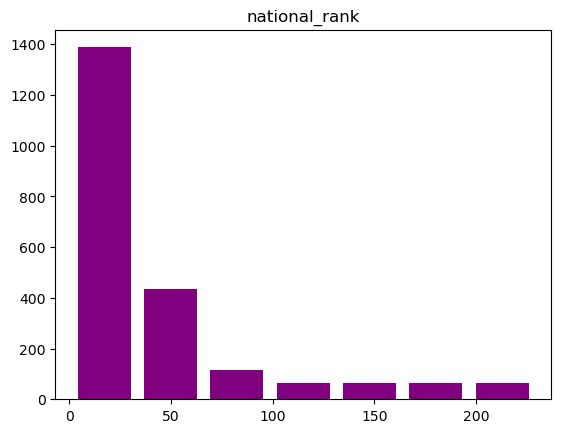

In [79]:
df.hist(column='national_rank', bins=7, grid=False, rwidth=.8, color='purple')

<AxesSubplot:>

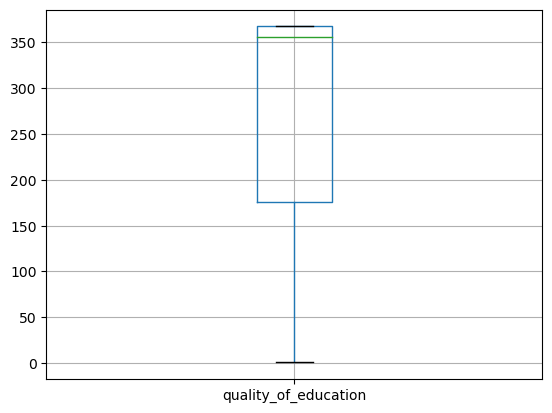

In [80]:
df.boxplot(column='quality_of_education')

<AxesSubplot:xlabel='influence', ylabel='patents'>

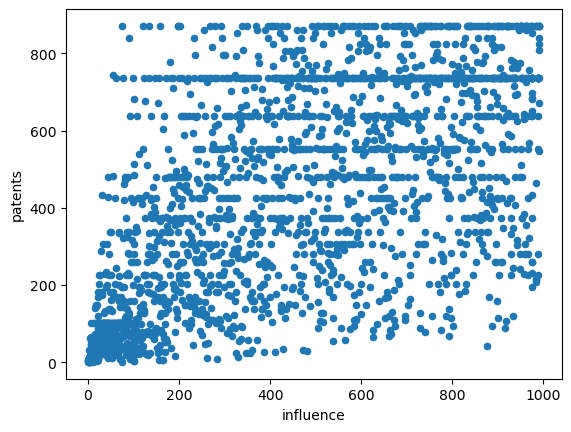

In [84]:
df.plot.scatter(x='influence', y='patents')

In [90]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


<AxesSubplot:xlabel='national_rank'>

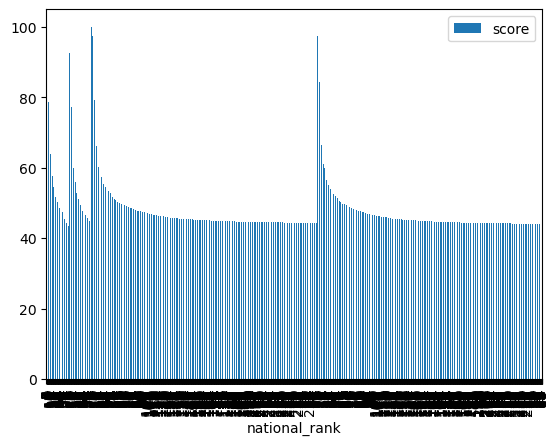

In [94]:
df[['national_rank', 'score']].plot(x='national_rank', kind='bar')

In [102]:
corr = df[['quality_of_education', 'publications']].corr()
corr.style.background_gradient(cmap='YlGn')

,quality_of_education,publications
quality_of_education,1.000000,0.624657
publications,0.624657,1.000000


<AxesSubplot:xlabel='country'>

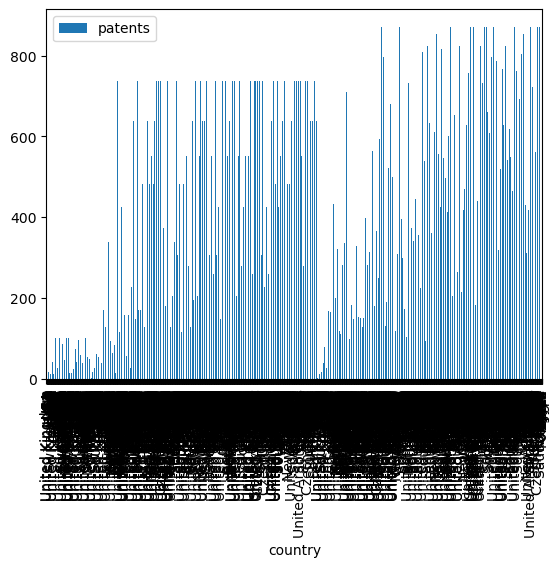

In [103]:
df[['country', 'patents']].plot(x='country', kind='bar')